<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week11/dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [63]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRTV6kfmSkZLO4vx8jtyQwSTey5RdOUR0IIzqZTHTexbFEQcZQy7_gKFPw9fxmMxUfoutVbsrH0X-Oj/pub?output=csv'
df = pd.read_csv(url, index_col = 'Name')
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [64]:
# Clean the data
print('Duplicates:', df.duplicated().sum())
print('Missing Values:', df.isna().sum().sum())

Duplicates: 12
Missing Values: 11


In [65]:
# Drop the duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [66]:
# Drop the missing values
df.dropna(inplace = True)
df.isna().sum().sum()

0

In [67]:
# Set the target and features
X = df.drop(columns = 'TARGET_5Yrs')
y = df['TARGET_5Yrs']

In [68]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [69]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [70]:
# Get the number of inputs
input_nodes = X_train.shape[1]
input_nodes

19

In [71]:
# Make a model without dropout
model = Sequential()
# First hidden layer
model.add(Dense(19, input_dim = input_nodes, activation = 'relu'))
# Second hidden layer
model.add(Dense(10, activation = 'relu'))
# Output layer
model.add(Dense(1, activation = 'sigmoid'))
# Compile the model
model.compile(loss = 'bce', optimizer = 'adam')
# Train the model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 100)

Epoch 1/100
31/31 [==============================] - 0s 5ms/step - loss: 0.6580 - val_loss: 0.6277
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 0.6175 - val_loss: 0.5998
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5977 - val_loss: 0.5857
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5835 - val_loss: 0.5733
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5764 - val_loss: 0.5641
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 0.5682 - val_loss: 0.5602
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5632 - val_loss: 0.5568
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5592 - val_loss: 0.5552
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5559 - val_loss: 0.5532
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5545 - val_loss: 0.5514
Epoch 11/

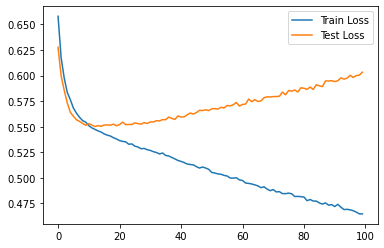

In [72]:
# Plot the loss
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()

In [73]:
# Build a model with dropout
model = Sequential()
# First hidden layer with dropout
model.add(Dense(19, input_dim = input_nodes, activation = 'relu'))
model.add(Dropout(0.2))
# Second hidden layer
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.2))
# Output layer
model.add(Dense(1, activation = 'sigmoid'))
# Compile the model
model.compile(loss = 'bce', optimizer = 'adam')
# Train the model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 100)

Epoch 1/100
31/31 [==============================] - 0s 4ms/step - loss: 0.7264 - val_loss: 0.6559
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 0.6633 - val_loss: 0.6229
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 0.6312 - val_loss: 0.5982
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 0.6254 - val_loss: 0.5822
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 0.6275 - val_loss: 0.5727
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 0.6189 - val_loss: 0.5682
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 0.6086 - val_loss: 0.5634
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 0.6006 - val_loss: 0.5591
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5969 - val_loss: 0.5557
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5786 - val_loss: 0.5511
Epoch 11/

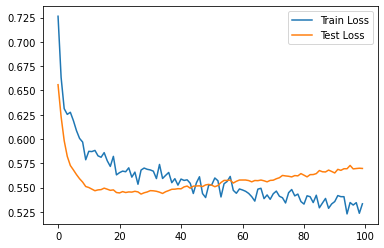

In [74]:
# Plot the loss
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()